In [2]:
!pip install tensorflow
!pip install numpy

In [3]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add


2025-07-05 14:54:22.299956: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-05 14:54:22.300460: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-05 14:54:22.303190: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-05 14:54:22.309684: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751707462.320551   14440 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751707462.32

In [4]:
print("numpy", np.__version__)

numpy 1.26.4


In [5]:
Base_DIR = '/home/soham-pande/Public/Learning_Computers/genAI_IBM'
working_DIR = '/home/soham-pande/Public/Learning_Computers/genAI_IBM/work'

In [6]:
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
print(model.summary())

2025-07-05 14:54:29.224158: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
features = {}
directory = os.path.join(Base_DIR, 'Images')

for img_name in tqdm(os.listdir(directory)):
    img_path = directory + '/' + img_name 
    image = load_img(img_path, target_size=(224,224))
    image = img_to_array(image)
    image = image.reshape((1,image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    feature = model.predict(image,verbose=0)
    image_id = img_name.split('.')[0]
    features[image_id] = feature

  0%|          | 0/8091 [00:00<?, ?it/s]

In [8]:
pickle.dump(features, open(os.path.join(working_DIR, 'features.pkl'), 'wb'))

In [9]:
with open(os.path.join(working_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

In [10]:
with open(os.path.join(Base_DIR, 'captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [11]:
mapping = {}

for line in tqdm(captions_doc.split('\n')):
    tokens = line.split(',')
    if (len(tokens) < 2):
        continue
    image_id, caption = tokens[0], tokens[1:]
    image_id = image_id.split('.')[0]
    caption = " ".join(caption)

    if image_id not in mapping:
        mapping[image_id] = []
    mapping[image_id].append(caption)

  0%|          | 0/40456 [00:00<?, ?it/s]

In [12]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            
            caption = captions[i]
            caption = caption.lower()
            caption = caption.replace('[^A-Za-z]', '')
            caption = caption.replace('\s', ' ')
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption
            

In [13]:
mapping['667626_18933d713e']

['A girl is stretched out in shallow water',
 'A girl wearing a red and multi-colored bikini is laying on her back in shallow water .',
 'A little girl in a red swimsuit is laying on her back in shallow water .',
 '"A young girl is lying in the sand   while ocean water is surrounding her ."',
 'Girl wearing a bikini lying on her back in a shallow pool of clear blue water .']

In [14]:
clean(mapping)

In [15]:
mapping['667626_18933d713e']


['startseq girl is stretched out in shallow water endseq',
 'startseq girl wearing red and multi-colored bikini is laying on her back in shallow water endseq',
 'startseq little girl in red swimsuit is laying on her back in shallow water endseq',
 'startseq "a young girl is lying in the sand while ocean water is surrounding her ." endseq',
 'startseq girl wearing bikini lying on her back in shallow pool of clear blue water endseq']

In [16]:
all_captions = []

for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)


In [17]:
len(all_captions)

40455

In [18]:
all_captions[:10]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tri-colored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq']

In [19]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [20]:
with open(os.path.join(working_DIR, 'tokenizer.pkl'), 'wb') as f:
    pickle.dump(tokenizer, f)
    
vocab_size

8485

In [21]:
max_length = max(len(caption.split()) for caption in all_captions)
max_length

35

In [22]:
image_ids = list(mapping.keys())
split = int(len(image_ids)* 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [23]:
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):

    X1, X2, y = list(), list(), list()
    n = 0

    while (1):
        for key in data_keys:
            n += 1
            captions = mapping[key]
            for caption in captions:
                seq = tokenizer.texts_to_sequences([caption])[0]

                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
                if n==batch_size:
                    X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                    yield(X1, X2), y
                    X1, X2, y = list(), list(), list()
                    n = 0

In [24]:
!pip install graphviz pydot


In [25]:
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)


inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)


decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)

outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)

model.compile(loss='categorical_crossentropy', optimizer='adam')

plot_model(model, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [26]:
epochs = 22
batch_size = 128
steps = len(train) // batch_size

for i in range(epochs):
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)


model.fit(generator, epochs=10, steps_per_epoch=steps, verbose=1)

Epoch 1/10


2025-07-05 15:10:28.727718: E tensorflow/core/util/util.cc:131] oneDNN supports DT_BOOL only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.
2025-07-05 15:10:28.903609: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 556897592 bytes after encountering the first element of size 556897592 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


56/56 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - loss: 6.4722
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 179s 3s/step - loss: 5.0500
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 179s 3s/step - loss: 4.2850
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - loss: 3.8067
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - loss: 3.5702
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - loss: 3.3913
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 181s 3s/step - loss: 3.2576
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 182s 3s/step - loss: 3.1302
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 181s 3s/step - loss: 3.0288
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 182s 3s/step - loss: 2.9399


In [27]:
model.save(working_DIR + '/model.h5')

In [28]:
model.save(working_DIR + '/model.keras', save_format='keras')

In [29]:
def index_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [30]:
def predict_caption(model, image, tokenizer, max_length):
    in_text = 'startseq'
    repeated_count = 0
    prev_word = None

    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)

        yhat = model.predict([image, sequence], verbose=0)
        yhat = np.argmax(yhat)

        word = index_to_word(yhat, tokenizer)

        if word is None:
            break

        # Repetition check
        if word == prev_word:
            repeated_count += 1
        else:
            repeated_count = 0

        if repeated_count > 2:  # Stop if same word predicted 3 times in a row
            break

        in_text += ' ' + word
        prev_word = word

        if word == 'endseq':
            break

    # Remove startseq and endseq for output
    final_caption = in_text.split()
    final_caption = [w for w in final_caption if w not in ['startseq', 'endseq']]
    return ' '.join(final_caption)


In [31]:
from nltk.translate.bleu_score import corpus_bleu

actual, predicted = list(), list()

for key in  tqdm(test):
    captions = mapping[key]
    y_pred = predict_caption(model, features[key], tokenizer, max_length)

    actual_caption = [caption.split() for caption in captions]
    if y_pred is None or not isinstance(y_pred, str) or y_pred.strip() == "":
        continue
    y_pred = y_pred.split()


    actual.append(actual_caption)
    predicted.append(y_pred)


print("BLEU-1 %f" % corpus_bleu(actual, predicted, weights=(1.0, 0,0,0))) 
print("BLEU-2 %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5,0,0)))

  0%|          | 0/810 [00:00<?, ?it/s]

BLEU-1 0.432683
BLEU-2 0.261335


In [32]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    image_id = image_name.split('.')[0]
    img_path = os.path.join(Base_DIR, "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]

    print('-------------------Actual------------------')
    for caption in captions:
        print(caption)
    
    y_pred = predict_caption(model,features[image_id], tokenizer, max_length)

    print('------------------Predicted----------------')

    print(y_pred)
    plt.imshow(image)

-------------------Actual------------------
startseq black dog leaps over log endseq
startseq grey dog is leaping over fallen tree endseq
startseq large black dog leaps fallen log endseq
startseq mottled black and grey dog in blue collar jumping over fallen tree endseq
startseq the black dog jumped the tree stump endseq
------------------Predicted----------------
dog jumps over fence


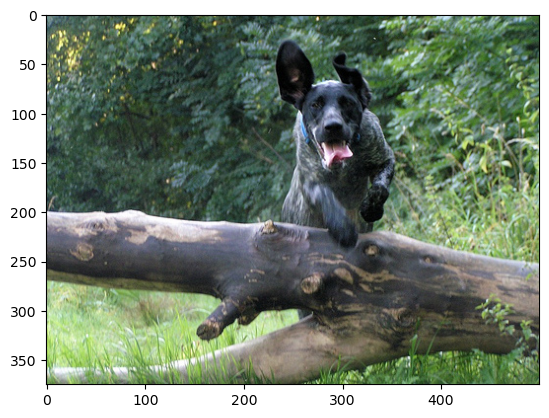

In [36]:
generate_caption('1015584366_dfcec3c85a.jpg')